In [32]:
import torch
import torch.nn as nn
import numpy as np
import math

In [16]:
#L1范数损失
x = torch.Tensor([1,2,3])
target = torch.Tensor([2,2,3])
criterion = nn.L1Loss()
loss = criterion(x,target)
print(loss.item())

0.3333333432674408


In [19]:
#SmoothL1Loss
x = torch.Tensor([1,2.1,3])
target = torch.Tensor([2,2,3])
criterion = nn.SmoothL1Loss()
loss = criterion(x,target)
print(loss.item())

0.16833333671092987


In [25]:
#MSE Loss
x = torch.Tensor([1,2.1,3])
target = torch.Tensor([2,2,3])
criterion = nn.MSELoss()
loss = criterion(x,target)
print(loss.item())

0.33666667342185974


In [103]:
#BCE二分类损失
target =torch.Tensor([0,0,1,1,0,1])
predict = torch.Tensor([0.3,0.2,0.8,0.9,0.1,0.95])
criterion = nn.BCELoss()
loss = criterion(predict,target)
print(loss.item())
bce_with_logits_loss = nn.BCEWithLogitsLoss()
print(bce_with_logits_loss(predict,target).item())

0.1774960607290268
0.5726836323738098


In [88]:
#CrossEntropyLoss
predict = torch.Tensor([[0.1,0.5,0.4],[0.1,0.1,0.8]])
label = torch.LongTensor([1,2])
loss = nn.CrossEntropyLoss(reduction="none")
print(loss(predict,label))
loss = nn.CrossEntropyLoss(reduction="mean")
print(loss(predict,label))
loss = nn.CrossEntropyLoss(reduction="sum")
print(loss(predict,label))

tensor([0.9459, 0.6897])
tensor(0.8178)
tensor(1.6356)


In [100]:
#softmax/log/nllloss
import torch.nn.functional as F
predict = torch.Tensor([[0.1,0.5,0.4],[0.1,0.1,0.8]])
label = torch.LongTensor([1,2])
softmax = torch.softmax(predict,dim=1)
print("step1 softmax:{}".format(softmax))
_log = torch.log(softmax)
print("step2 log:{}".format(_log))
nll_loss = F.nll_loss(_log,label)
print("step3 nll_loss:{}".format(nll_loss))

step1 softmax:tensor([[0.2603, 0.3883, 0.3514],
        [0.2491, 0.2491, 0.5017]])
step2 log:tensor([[-1.3459, -0.9459, -1.0459],
        [-1.3897, -1.3897, -0.6897]])
step3 nll_loss:0.8178186416625977


In [127]:
#KLDivLoss
predict = torch.Tensor([0.1,0.5,0.4])
label = torch.Tensor([0.4,0.5,0.1])
loss = nn.KLDivLoss()
loss(label,predict).item()

-0.42444947361946106

In [162]:
#CosineEmbeddingLoss
x = torch.Tensor([[0.1,0.5,0.4],[0.1,0.5,0.4]])
y = torch.Tensor([[0.4,0.5,0.1],[0.1,0.5,0.4]])
label = torch.Tensor([-1,1])
loss = nn.CosineEmbeddingLoss()
loss(x,y,label).item()

0.3928571045398712

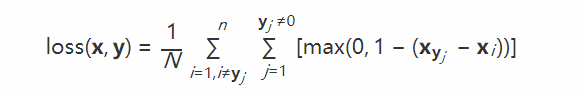

In [223]:
#MultiLabelMarginLoss
from IPython.display import Image
Image("./imgs/1.png")
#input : x --> (N, c), y --> (N, c)其中y是 LongTensor, 且其元素为类别的index

In [257]:
loss = torch.nn.MultiLabelMarginLoss()
x = torch.FloatTensor([[0.1, 0.2, 0.4, 0.8,1.1,4,7]])
y = torch.LongTensor([[5, 4,3,0,-1,1,2]])
loss(x, y).item()

4.257142543792725

In [258]:
#5,4,3,0 为正确类别索引  1,2,6为错误类别索引
(1-(4-0.2))+(1-(1.1-0.2))+(1-(0.8-0.2))+(1-(0.1-0.2))
(1-(4-0.4))+(1-(1.1-0.4))+(1-(0.8-0.4))+(1-(0.1-0.4))
(1-(4-7))+(1-(1.1-7))+(1-(0.8-7))+(1-(0.1-7))

25.700000000000003

In [269]:
(0+0.1+0.4+1.1+0+0.3+0.6+1.3+4+6.9+7.2+7.9)/7

4.257142857142857